In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [131]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [132]:
# initial data
data_init = lambda name: pd.read_csv(f'data/{name}_data.csv')

df_train = data_init('train')
df_test = data_init('test')

df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.38 MB
Decreased by 60.9%


In [133]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.299999,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,100000000.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.300000,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.000000,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,100000000.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.500000,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.600000,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   category
 1   Annual Income                 5943 non-null   float32 
 2   Years in current job          7129 non-null   category
 3   Tax Liens                     7500 non-null   float32 
 4   Number of Open Accounts       7500 non-null   float32 
 5   Years of Credit History       7500 non-null   float32 
 6   Maximum Open Credit           7500 non-null   float32 
 7   Number of Credit Problems     7500 non-null   float32 
 8   Months since last delinquent  3419 non-null   float32 
 9   Bankruptcies                  7486 non-null   float32 
 10  Purpose                       7500 non-null   category
 11  Term                          7500 non-null   category
 12  Current Loan Amount           7500 non-null   fl

In [135]:
# Check proportionality
df_train.shape[1] - df_test.shape[1] == 1

True

### Nan

In [136]:
# 5 columns with NaN: [
#   'Annual Income',
#   'Years in current job',
#   'Months since last delinquent',
#   'Bankruptcies',
#   'Credit Score'
# ]
df_train.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [137]:
def change_on_median(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].median()

def change_on_frequent(feature):
    df_train.loc[df_train[feature].isna(), feature] = df_train[feature].value_counts().index[0]

#### 1. Column: Annual Income  (numerical)

In [138]:
df_train['Annual Income'].head(6)

0     482087.0
1    1025487.0
2     751412.0
3     805068.0
4     776264.0
5          NaN
Name: Annual Income, dtype: float32

In [139]:
# 'Annual Income' == NaN => median
change_on_median('Annual Income')
df_train['Annual Income'].isna().sum()
#df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()

0

#### 2. Column: Years in current job  (categorical)

In [140]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [141]:
# 'Years in current job' == NaN => most frequent  ()
change_on_frequent('Years in current job')
df_train['Years in current job'].value_counts()

10+ years    2703
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [142]:
#### 3. Column: Months since last delinquent (numerical)
df_train['Months since last delinquent'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Months since last delinquent, dtype: float32

In [143]:
change_on_median('Months since last delinquent')
df_train['Months since last delinquent'].isna().sum()

0

#### 4. Column: Bankruptcies  (categorical)

In [144]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [145]:
# 'Bankruptcies' == NaN => most frequent  ()
change_on_frequent('Bankruptcies')
df_train['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

#### 5. Column: Credit Score  (numerical)

In [146]:
df_train['Credit Score'].head(6)

0    749.0
1    737.0
2    742.0
3    694.0
4    719.0
5      NaN
Name: Credit Score, dtype: float32

In [147]:
# 'Credit Score' == NaN => median
change_on_median('Credit Score')
df_train['Credit Score'].isna().sum()

0

### Categorical in Num-category

In [148]:
cat_cols = df_train.select_dtypes(include=['category']).columns
cat_cols

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

In [149]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col_name in cat_cols:
    df_train[col_name] = encoder.fit_transform(df_train[col_name])

# value of uni
df_train[cat_cols].nunique()

Home Ownership           4
Years in current job    11
Purpose                 15
Term                     2
dtype: int64

In [150]:
# "Years in current job", "Purpose" => binary encoding
# (because onehot very big for 11 and 15 unique values)
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Years in current job', 'Purpose'])

df_train = encoder.fit_transform(df_train)
df_train.head(6)

,Home Ownership,Annual Income,Years in current job_0,Years in current job_1,Years in current job_2,Years in current job_3,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,...,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,482087.0,0,0,0,1,0.0,11.0,26.299999,685960.0,...,0,0,0,1,1,100000000.0,47386.0,7914.0,749.0,0
1,2,1025487.0,0,0,0,1,0.0,15.0,15.300000,1181730.0,...,0,0,0,1,0,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,0,0,1,0,0.0,11.0,35.000000,1182434.0,...,0,0,0,1,1,100000000.0,308389.0,13651.0,742.0,0
3,2,805068.0,0,0,1,1,0.0,8.0,22.500000,147400.0,...,0,0,0,1,1,121396.0,95855.0,11338.0,694.0,0
4,3,776264.0,0,0,1,0,0.0,13.0,13.600000,385836.0,...,0,0,0,1,1,125840.0,93309.0,7180.0,719.0,0
5,3,1168386.0,0,1,0,0,0.0,12.0,14.600000,366784.0,...,0,0,1,0,0,337304.0,165680.0,18692.0,731.0,1


### Correlation

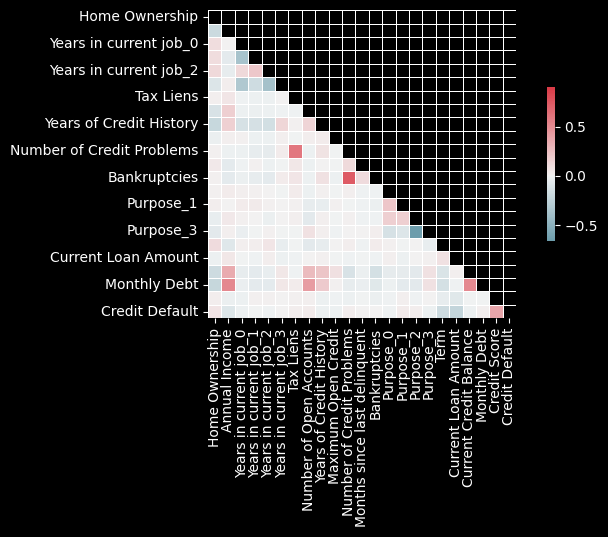

In [151]:
corr = df_train.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig('./images/train_corrs.png', dpi=300)

In [152]:
print(corr['Credit Default'].sort_values(ascending = False),'\n')

Credit Default                  1.000000
Credit Score                    0.376220
Home Ownership                  0.065620
Number of Open Accounts         0.028884
Purpose_1                       0.027686
Tax Liens                       0.024368
Purpose_2                       0.022783
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
Years in current job_3          0.006867
Months since last delinquent    0.002830
Bankruptcies                    0.001640
Years in current job_1         -0.000370
Purpose_0                      -0.005289
Years in current job_2         -0.007801
Years in current job_0         -0.012895
Purpose_3                      -0.013222
Maximum Open Credit            -0.014275
Current Credit Balance         -0.019522
Years of Credit History        -0.020567
Annual Income                  -0.095203
Term                           -0.181487
Current Loan Amount            -0.226522
Name: Credit Default, dtype: float64 



In [153]:
# Feature with more strong correlation
print(corr['Number of Credit Problems'].sort_values(ascending = False), '\n')

Number of Credit Problems       1.000000
Bankruptcies                    0.730808
Tax Liens                       0.595339
Months since last delinquent    0.113736
Years of Credit History         0.071259
Years in current job_3          0.028745
Term                            0.020433
Credit Default                  0.020088
Purpose_0                       0.014480
Purpose_2                       0.012548
Home Ownership                  0.007463
Purpose_3                       0.001146
Purpose_1                      -0.000419
Maximum Open Credit            -0.004750
Current Loan Amount            -0.008596
Annual Income                  -0.013789
Credit Score                   -0.016497
Number of Open Accounts        -0.017813
Years in current job_0         -0.021599
Monthly Debt                   -0.042252
Years in current job_1         -0.045771
Years in current job_2         -0.050506
Current Credit Balance         -0.124137
Name: Number of Credit Problems, dtype: float64 



### Emissions

In [154]:
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job_0',
       'Years in current job_1', 'Years in current job_2',
       'Years in current job_3', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Purpose_0', 'Purpose_1', 'Purpose_2', 'Purpose_3',
       'Term', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

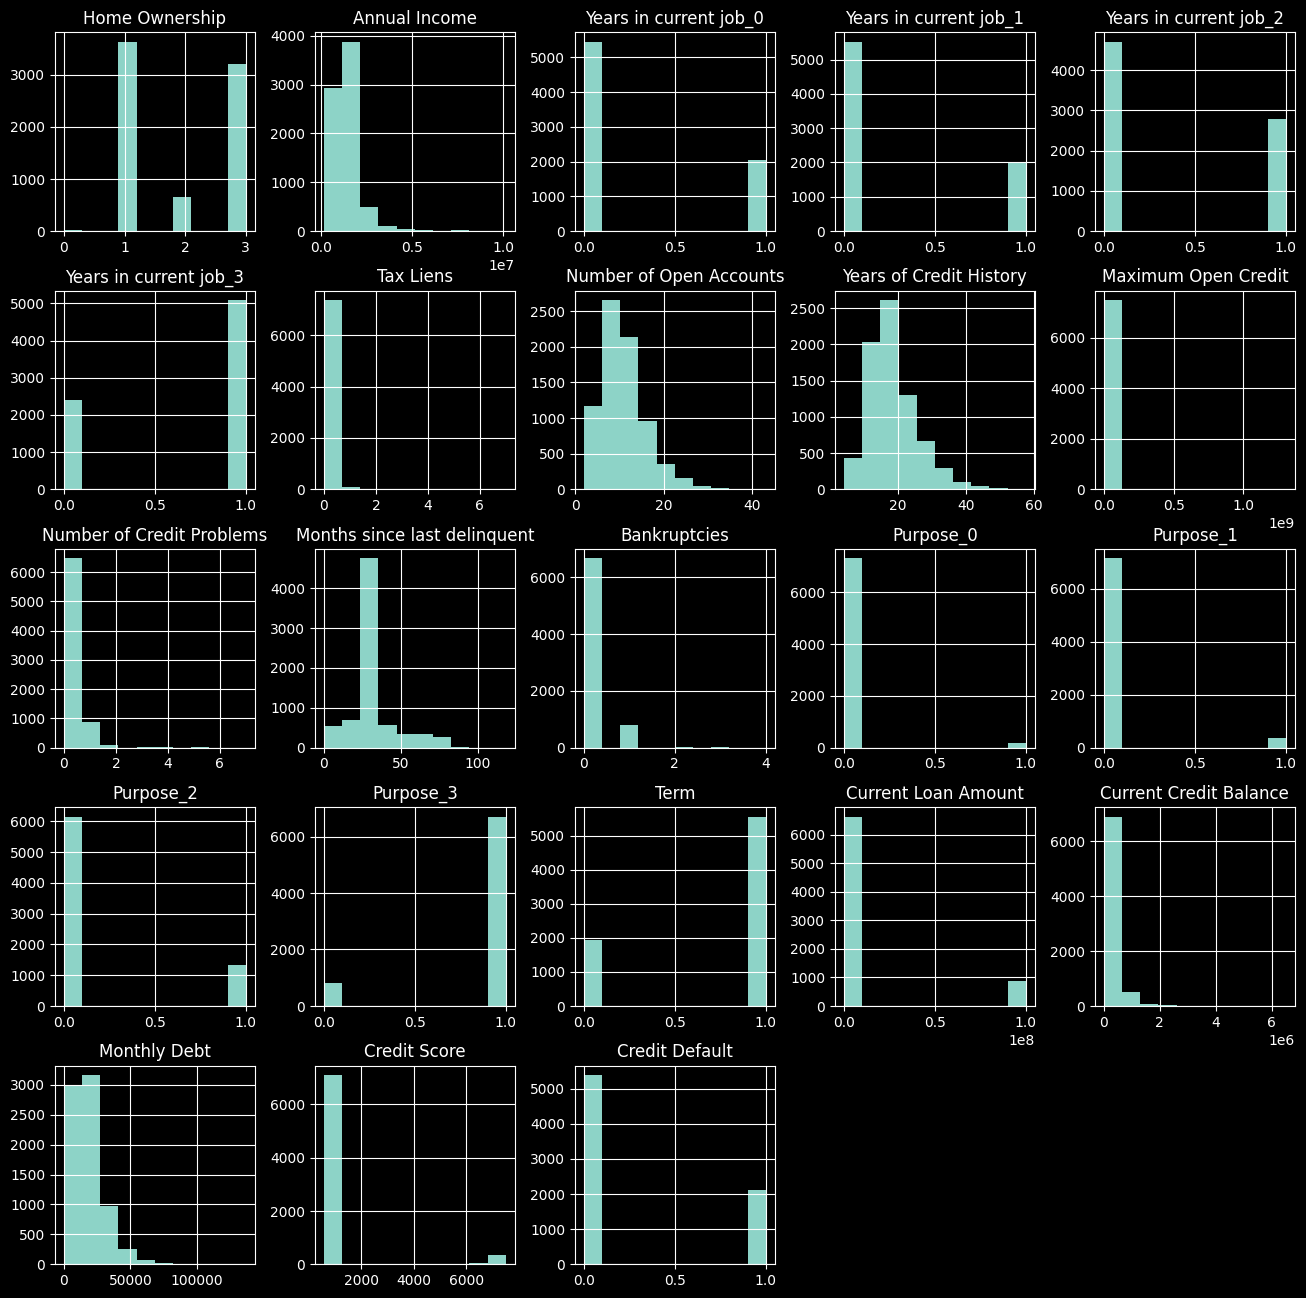

In [155]:
df_train[numeric_features.columns].hist(figsize=(16, 16))
plt.show()

### Balancing classes

In [156]:
target_name = 'Credit Default'

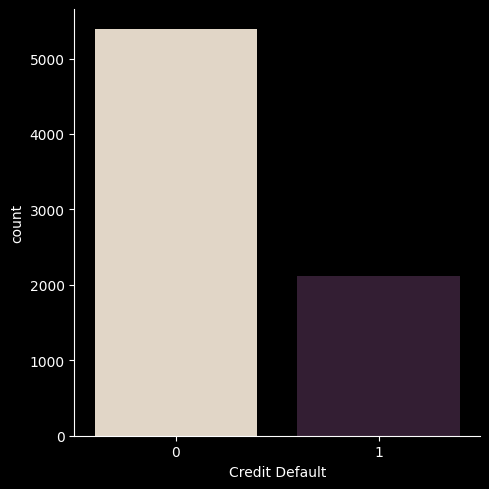

In [157]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

We observe an imbalance of classes. Let's create a balancing function.

In [158]:
def balancing_target(data, target_name):
    target_counts = data[target_name].value_counts()

    big_cls = target_counts.argmax()
    min_cls = target_counts.argmin()

    # imbalance coef
    ratio = (target_counts[big_cls] / target_counts[min_cls])

    # integer value => ratio of big_class / small_class
    iters = int(ratio)

    for i in range(iters):
        # balancing classes
        sample = data[data[target_name] == min_cls].sample(int(target_counts[min_cls] * ((ratio % 1) if (i == iters - 1) else 1)))
        data = pd.concat([data, sample], axis=0, ignore_index=True)

    return data.sample(frac=1)

In [159]:
df_train = balancing_target(df_train, target_name)
df_train

,Home Ownership,Annual Income,Years in current job_0,Years in current job_1,Years in current job_2,Years in current job_3,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,...,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1684,1,845348.0,1,0,0,0,0.0,9.0,14.400000,0.0,...,0,0,1,0,0,261008.0,0.0,8925.0,742.0,0
3541,1,2615844.0,0,0,0,1,0.0,14.0,21.900000,2871902.0,...,0,0,0,1,0,757218.0,1904864.0,53843.0,736.0,0
7501,1,861935.0,0,0,1,0,0.0,11.0,12.500000,391468.0,...,0,0,1,0,0,221782.0,50369.0,23128.0,666.0,1
4536,1,807025.0,0,0,0,1,0.0,11.0,14.900000,763488.0,...,0,0,0,1,1,418836.0,443764.0,22395.0,740.0,0
2808,1,1168386.0,0,0,0,1,0.0,20.0,32.799999,1811920.0,...,0,0,0,1,1,497354.0,317661.0,28349.0,731.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,1,1168386.0,0,1,0,1,0.0,5.0,26.900000,532466.0,...,0,0,0,1,0,532334.0,412946.0,18734.0,731.0,0
3869,3,750196.0,1,0,0,1,0.0,11.0,8.800000,203412.0,...,0,0,0,1,1,104236.0,53580.0,2607.0,732.0,0
1002,1,1232416.0,0,0,0,1,0.0,9.0,13.500000,399234.0,...,0,1,0,1,1,109780.0,124811.0,5238.0,724.0,0
3713,3,1459580.0,0,1,0,1,0.0,10.0,19.200001,529298.0,...,0,0,0,1,1,129184.0,206169.0,19583.0,710.0,0


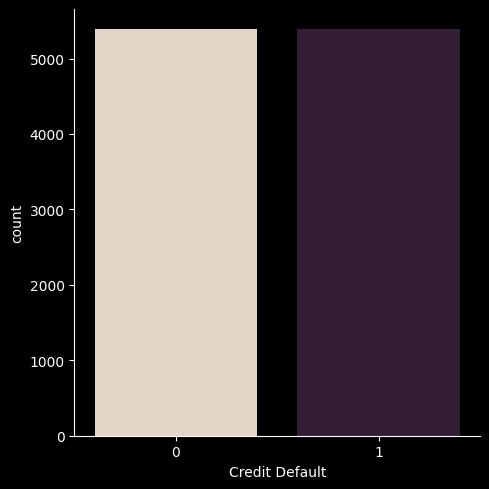

In [160]:
sns.catplot(data=df_train, x=target_name, kind='count', palette='ch:.25')
plt.show()

### Splitting data

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
target = df_train['Credit Default']
data = df_train.drop(['Credit Default'], axis=1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [164]:
X_train.shape

(8618, 22)

### Normalization

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
# scaler = MinMaxScaler()
# scaler.fit(df_train)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10773 entries, 1684 to 3316
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                10773 non-null  int32  
 1   Annual Income                 10773 non-null  float32
 2   Years in current job_0        10773 non-null  int64  
 3   Years in current job_1        10773 non-null  int64  
 4   Years in current job_2        10773 non-null  int64  
 5   Years in current job_3        10773 non-null  int64  
 6   Tax Liens                     10773 non-null  float32
 7   Number of Open Accounts       10773 non-null  float32
 8   Years of Credit History       10773 non-null  float32
 9   Maximum Open Credit           10773 non-null  float32
 10  Number of Credit Problems     10773 non-null  float32
 11  Months since last delinquent  10773 non-null  float32
 12  Bankruptcies                  10773 non-null  float32
 13 

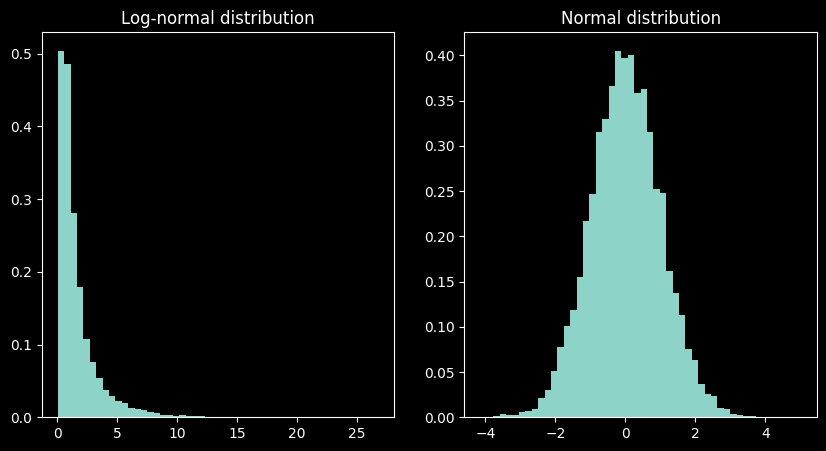

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data that follows a log-normal distribution
np.random.seed(1234)
data_lognormal = np.random.lognormal(mean=0, sigma=1, size=10000)

# Generate random data that follows a normal distribution
np.random.seed(4321)
data_normal = np.random.normal(loc=0, scale=1, size=10000)

# Plot histograms of both datasets
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.hist(data_lognormal, bins=50, density=True)
ax1.set_title('Log-normal distribution')
ax2.hist(data_normal, bins=50, density=True)
ax2.set_title('Normal distribution')
plt.show()